In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainData = pd.read_csv('train.csv')
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
trainData.shape

(891, 12)

In [5]:
trainData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
trainData['Sex']=trainData['Sex'].map({'male':0, 'female':1}).astype(int)

In [8]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import seaborn as sns

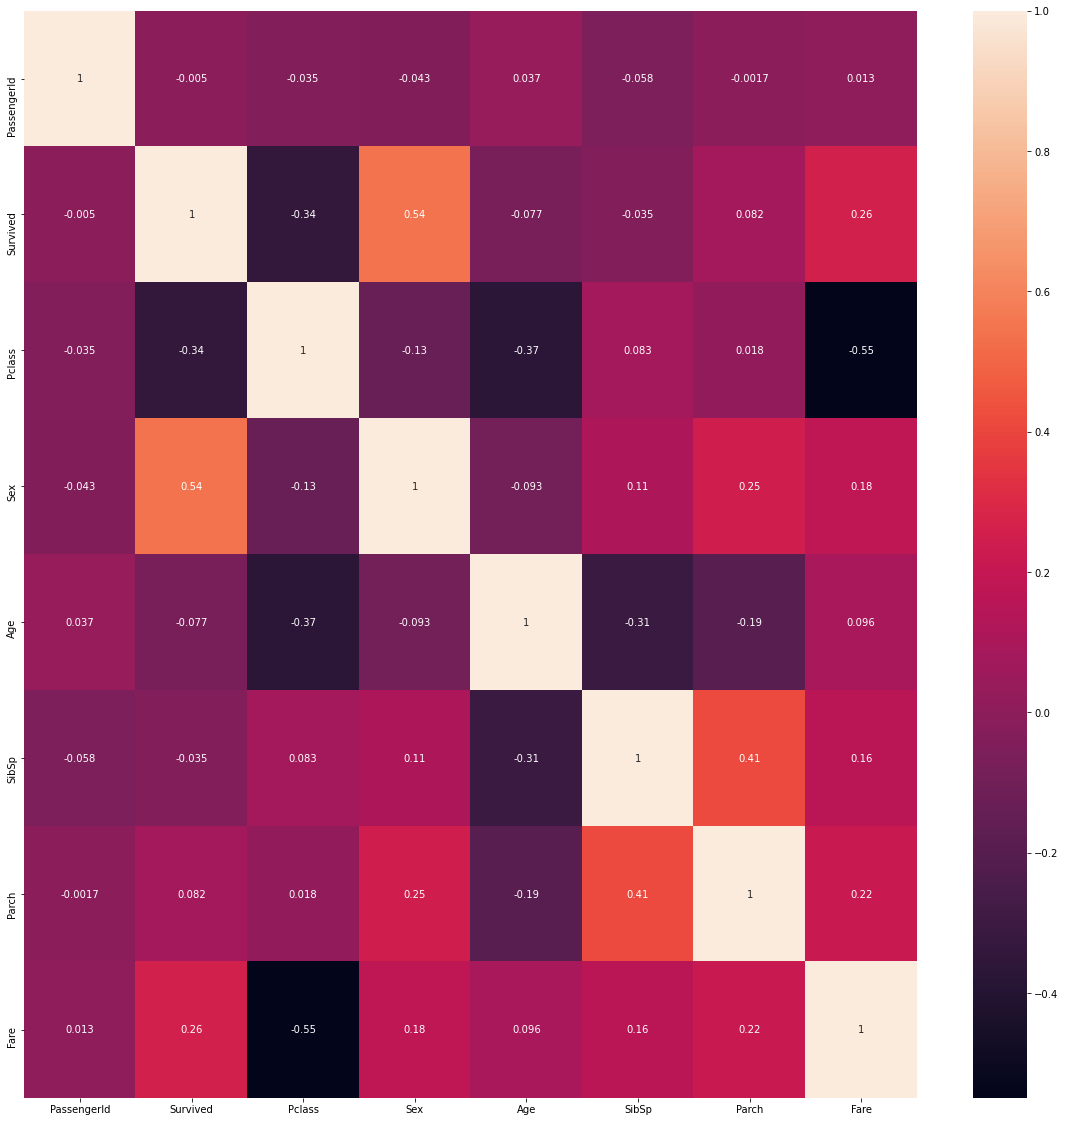

In [10]:
corrMat = trainData.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corrMat,annot = True)

In [8]:
#People with missing embarked number..
trainData[trainData.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [9]:
#These are the people who paid a range of same price and were in same Pclass..
subembarked = trainData[(trainData.Pclass == 1) & (trainData.Fare < 81) & (trainData.Fare > 79)]
subembarked.Embarked.mode()[0]

'C'

In [10]:
trainData['Embarked'] = trainData.Embarked.fillna(subembarked.Embarked.mode()[0])
trainData.Embarked.isnull().sum()

0

In [11]:
#Lets drop Cabin Column as it is having alot of NA values..
trainData = trainData.drop(['Cabin'], axis = 1)

In [16]:
#They are saying that..
#For age we can use Pclass and Sex to determine age...as they are much correlated features...
import numpy as np
ags = np.zeros((2,3))
ags

array([[0., 0., 0.],
       [0., 0., 0.]])

In [19]:
def find_ages(trainData):
    for i in range(0,2):
        for j in range(0,3):
            guessData = trainData[(trainData['Sex'] == i) & (trainData['Pclass'] == j+1)]['Age'].dropna()
            guess = guessData.median()
            print('guess',guess)
            
            ags[i,j] = int(guess/0.5 + 0.5)*0.5
            print(ags[i,j])
            
    for i in range(0,2):
        for j in range(0,3):
            trainData.loc[(trainData.Age.isnull()) & (trainData.Sex == i) & (trainData.Pclass == j+1),'Age'] = ags[i,j]
    
    trainData['Age'] = trainData['Age'].astype(int)

In [22]:
find_ages(trainData)

guess 40.0
40.0
guess 30.0
30.0
guess 25.0
25.0
guess 35.0
35.0
guess 28.0
28.0
guess 21.0
21.0


In [18]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 76.7+ KB


# Exploratory Data Analysis
## Now our data is clean and ready to analyze !



## Question 1: What is the number of survivors and non-survivors among those who boarded from which port by gender and in what class?

In [31]:
pd.crosstab([trainData.Embarked,trainData.Pclass],[trainData.Sex, trainData.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

## Question 2: What are the Passengers' survival percentages by class and gender?

In [20]:
pd.crosstab([trainData.Sex, trainData.Survived],trainData.Pclass, margins=True).style.background_gradient(cmap = 'summer_r')

## Question 3 : Number of survived/drowned passengers by age and gender?

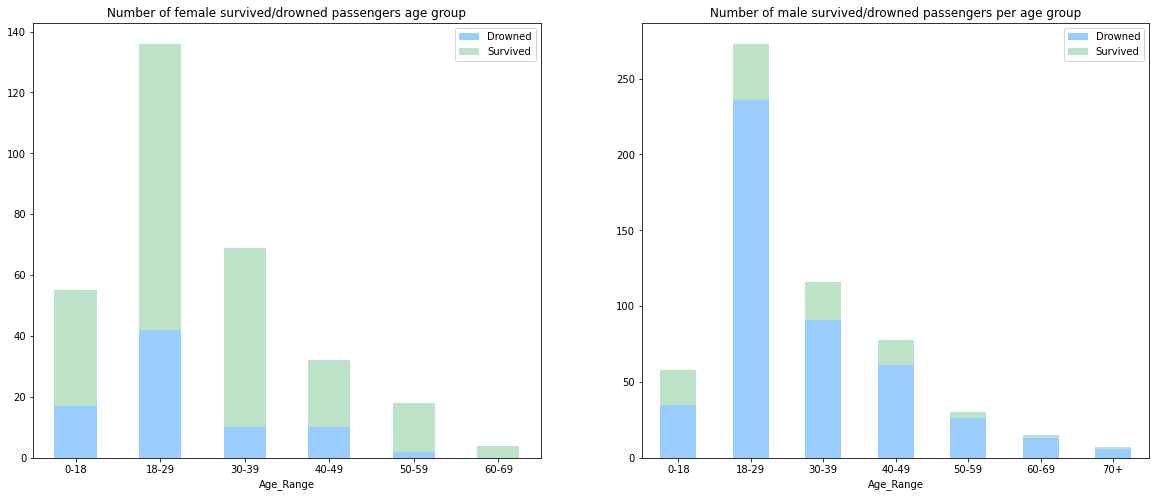

In [21]:
def age_buckets(x): 
    if x < 18: return '0-18' 
    elif x < 30: return '18-29'
    elif x < 40: return '30-39' 
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x >=70: return '70+' 
    else: return 'other'
    
    
trainData["Age"] = trainData["Age"].astype(int)

trainData["Age_Range"] = trainData["Age"].apply(lambda x: age_buckets(x))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  

grouped_by_age_female = trainData[trainData["Sex"] == 1].groupby(["Age_Range"])["Survived"].value_counts().unstack()
grouped_by_age_female.plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax1, title="Number of female survived/drowned passengers age group")
ax1.legend(('Drowned', 'Survived'))

grouped_by_age_men = trainData[trainData["Sex"] == 0].groupby(["Age_Range"])["Survived"].value_counts().unstack()
grouped_by_age_men.plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax2, title="Number of male survived/drowned passengers per age group")
ax2.legend(('Drowned', 'Survived'))

In [25]:
#Test Dataset
testData = pd.read_csv('test.csv')

In [26]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
testData.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
testData.shape

(418, 11)

In [29]:
testData.drop(['Cabin'], axis = 1, inplace = True)

In [30]:
testData['Sex'] = testData['Sex'].map({'male':0, 'female':1}).astype(int)
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [28]:
find_ages(testData)

In [24]:
testData.isna().sum()

NameError: name 'testData' is not defined

In [23]:
testData[testData.Fare.isna()]

NameError: name 'testData' is not defined

In [31]:
testMedian = testData[testData.Pclass == 3].Fare.median()

In [32]:
testData['Fare'].fillna(testMedian, inplace = True)

In [33]:
testData.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [34]:
testData['Age'] = testData['Age'].astype(int)
# testData["Age_Range"] = testData["Age"].apply(lambda x: age_buckets(x))

In [35]:
trainData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Age_Range       object
dtype: object

In [36]:
testData.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [37]:
def add_title(df):
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [38]:
# trainData['Name'] = trainData['Name'].astype(str)
add_title(trainData)
trainData['Embarked'] = trainData['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
trainData.drop('Age_Range', axis = 1, inplace = True)
trainData.drop(['Ticket'], axis = 1, inplace = True)
trainData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Title           object
dtype: object

In [39]:
# testData['Name'] = testData['Name'].astype(str)
add_title(testData)
testData.drop('Ticket', axis = 1, inplace = True)
testData['Embarked'] = testData['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
testData.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Title           object
dtype: object

In [40]:
def num_title(data):
    title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

In [41]:
num_title(trainData)
num_title(testData)

In [42]:
trainData.drop('Name', axis = 1, inplace = True)
testData.drop('Name', axis = 1, inplace = True)

In [43]:
# We should creat age band get better predict.

def age_range(df):
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age']

In [44]:
age_range(trainData)
age_range(testData)

In [45]:
trainData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,0,1
1,2,1,1,1,2,1,0,71.2833,1,3
2,3,1,3,1,1,0,0,7.9250,0,2
3,4,1,1,1,2,1,0,53.1000,0,3
4,5,0,3,0,2,0,0,8.0500,0,1


In [46]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,2,1
1,893,3,1,2,1,0,7.0000,0,3
2,894,2,0,3,0,0,9.6875,2,1
3,895,3,0,1,0,0,8.6625,0,1
4,896,3,1,1,1,1,12.2875,0,3


In [47]:
# trainEncodedData = pd.get_dummies(trainData)
trainFeatures = trainData.drop('Survived', axis = 1)
trainTarget = trainData['Survived']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(trainFeatures, trainTarget, test_size = 0.2)

In [50]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
840,841,3,0,1,0,0,7.9250,0,1
202,203,3,0,2,0,0,6.4958,0,1
424,425,3,0,1,1,1,20.2125,0,1
448,449,3,1,0,2,1,19.2583,1,2
654,655,3,1,1,0,0,6.7500,2,2
...,...,...,...,...,...,...,...,...,...
469,470,3,1,0,2,1,19.2583,1,2
66,67,2,1,1,0,0,10.5000,0,3
799,800,3,1,1,1,1,24.1500,0,3
596,597,2,1,1,0,0,33.0000,0,2


In [51]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
631,632,3,0,3,0,0,7.0542,0,1
390,391,1,0,2,1,2,120.0000,0,1
360,361,3,0,2,1,4,27.9000,0,1
97,98,1,0,1,0,1,63.3583,1,1
691,692,3,1,0,0,1,13.4167,1,2
...,...,...,...,...,...,...,...,...,...
175,176,3,0,1,1,1,7.8542,0,1
92,93,1,0,2,1,0,61.1750,0,1
197,198,3,0,2,0,1,8.4042,0,1
438,439,1,0,3,1,4,263.0000,0,1


In [52]:
y_train

840    0
202    0
424    0
448    1
654    0
      ..
469    1
66     1
799    0
596    1
773    0
Name: Survived, Length: 712, dtype: int64

In [53]:
y_test

631    0
390    1
360    0
97     1
691    1
      ..
175    0
92     0
197    0
438    0
517    0
Name: Survived, Length: 179, dtype: int64

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
from sklearn.ensemble import RandomForestClassifier
validation_classifier = RandomForestClassifier()

In [59]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_sample_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [60]:
randomgrid = {'n_estimators':n_estimators,
             'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf
             }

In [61]:
validationCV = RandomizedSearchCV(estimator = validation_classifier, param_distributions=randomgrid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 100, n_jobs = 1)

In [130]:
validationCV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=   2.3s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=   2.1s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=   2.0s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=   2.1s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=900, min_samples_split=5,

[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

In [131]:
validationCV.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(validationCV.predict(X_test), y_test)

0.8435754189944135

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
logreg = LogisticRegression()
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

In [85]:
logreg.fit(X_train_transformed, y_train )

LogisticRegression()

In [86]:
logreg.predict(X_test_transformed)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [87]:
accuracy_score(logreg.predict(X_test_transformed), y_test)

0.8044692737430168

In [88]:
from sklearn.ensemble import AdaBoostClassifier
validationBoost = AdaBoostClassifier()

In [93]:
validationBoost.fit(X_train, y_train)

AdaBoostClassifier()

In [94]:
validationBoost.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

In [96]:
accuracy_score(validationBoost.predict(X_test), y_test)

0.7988826815642458

In [116]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_sample_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
loss = ['deviance','exponential']
learning = [0.05,0.1,0.2,0.35,0.5,0.65,0.7,0.85]

gradientgrid = {'n_estimators':n_estimators,
             'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf,
                'loss':loss,
                'learning_rate':learning
             }

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [118]:
gradientCV = RandomizedSearchCV(estimator = gbc, param_distributions=gradientgrid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [119]:
gradientCV.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2, total=   1.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2, total=   1.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2, total=   1.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=exponential, learning_rate=0.2, total=   

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, loss=exponential, learning_rate=0.2, total=   1.2s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, loss=exponential, learning_rate=0.2 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, loss=exponential, learning_rate=0.2, total=   1.2s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, loss=exponential, learning_rate=0.2 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, loss=exponential, learning_rate=0.2, total=   1.0s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, loss=exponential, learning_rate=0.2 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, loss=exponential, learning_rate=0.2, to

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.35,
                                                          0.5, 0.65, 0.7,
                                                          0.85],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                              

In [120]:
gradientCV.predict(X_test_transformed)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [121]:
accuracy_score(gbc.predict(X_test_transformed), y_test)

0.8044692737430168

In [122]:
accuracy_score(gradientCV.predict(X_test_transformed), y_test)

0.8100558659217877

In [ ]:
trainFeatures.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_sample_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
randomgrid = {'n_estimators':n_estimators,
             'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf
             }

In [ ]:
cv = RandomizedSearchCV(estimator = classifier, param_distributions=randomgrid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 100, n_jobs = 1)

In [ ]:
cv.fit(trainFeatures, trainTarget)

In [ ]:
# testEncodedData = pd.get_dummies(testData)
testData

In [ ]:
cv.predict(testData)

In [ ]:
cv.score(trainFeatures, trainTarget)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(trainFeatures,trainTarget)
logreg.predict(testData)

In [ ]:
logreg.score(trainFeatures,trainTarget)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(trainFeatures,trainTarget)
lda.predict(testData)

In [ ]:
lda.score(trainFeatures,trainTarget)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier()

In [ ]:
boost.fit(trainFeatures, trainTarget)
boost.predict(testData)

In [ ]:
boost.score(trainFeatures, trainTarget)

In [ ]:
estimates = [int(x) for x in np.linspace(10,100,10)]
learning = [0.20,0.25,0.30,0.50,0.75,0.80,1.0]
params = {'n_estimators':estimates, 'learning_rate':learning}
cv2 = RandomizedSearchCV(estimator = boost, param_distributions=params, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, n_jobs = 1)
cv2.fit(trainFeatures, trainTarget)

In [ ]:
cv2.predict(testData)

In [ ]:
cv2.score(trainFeatures,trainTarget)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(cv2.predict(testData), cv.predict(testData))

Minimum error:- 0.33519553072625696 at K = 29


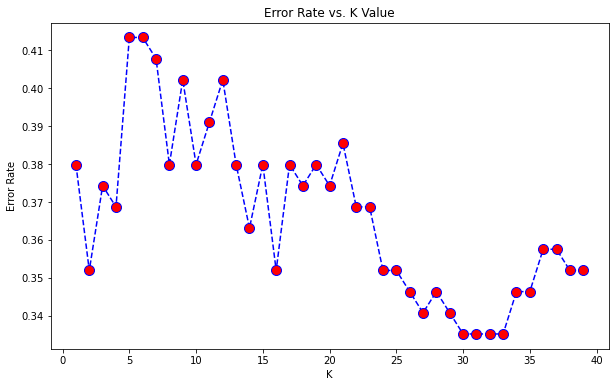

In [124]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.664804469273743 at K = 29


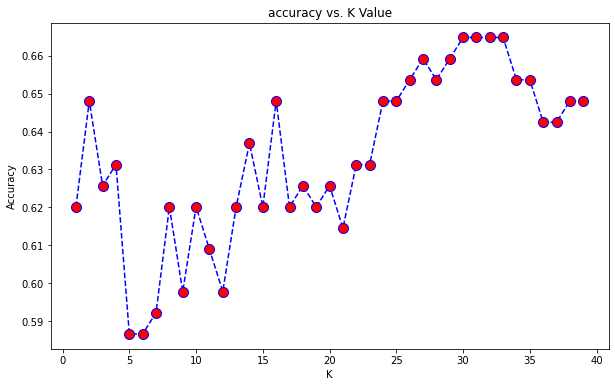

In [125]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [129]:
testData.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [135]:
final_prediction = validationCV.predict(testData)

In [134]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [136]:
submission['Survived'] = final_prediction

In [137]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [138]:
submission.to_csv('myFirstSubmission.csv', index = False)